PROJECT PLAN

Project Scoping

1. Load and browse the dataset, inspect its shape, features, data types
2. Formulate valid questions to analyze through the available data

Data analysis

3. Data cleanup
4. Data analysis (relationships)

Machine learning

5. Feature engineering
6. Hyperparameter tuning
7. Creating and evaluating the model

# INTRODUCTION


This project analyzes data from on-line dating application OKCupid. The dataset has been provided by Codecademy and the project will focus on summarizing the available data, formulating valid questions pertaining to the available data and finally building and testing a machine learning model to answer the formulated questions. Particularly, the project will focus on predicting the zodiac sign based on the personal data provided by a user.

# PROJECT SCOPING

## Loading and summarizing the data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data_file = pd.read_csv('profiles.csv')
print(f'DataFrame columns: {data_file.shape[1]}')
print(f'DataFrame rows: {data_file.shape[0]}')
print('DataFrame info:')
print(data_file.info())



DataFrame columns: 31
DataFrame rows: 59946
DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null 

DataFrame sample:

In [3]:
data_file.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


## Goal of the project

Possible predictions:
1. Predict the zodiac sign
2. Predict sex
3. Predict religion
4. Predict drugs
5. Predict your ideal partner's age based on other criteria
6. Predict your ideal partner's religion based on other criteria

Question to analyze:
Build a model that predicts a zodiac sign based on the data

Steps:
1. Cleanup data
2. Select features
3. Select model
4. Select hyperparameters

# DATA ANALYSIS

## DATA CLEANUP

AIs:
1. Handle nans
2. Check for outliers
3. Create bins/categories

### Reducing the unique values for categorical features and handling nans

First glance at the data shows a number of features that can be ignored for our purposes, specifically the "essay" comments and the "last online" information.

In [4]:
#features_of_interest = ['body_type', 'job','diet', 'drinks', 'drugs', 'education', 'orientation','sex', 'smokes', 'status', 'religion', 'ethnicity']
#removing unwanted features
data_file = data_file.drop(columns=['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9','last_online'])


Since most of the available features are of an "object" type, let's see how many unique values they hold.

In [5]:
print(data_file['age'].dtype)
print(data_file['job'].dtype)

int64
object


body_type has 12 unique values: 
        ['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
diet has 18 unique values: 
        ['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
drinks has 6 unique values: 
        ['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
drugs has 3 unique values: 
        ['never' 'sometimes' nan 'often']
education has 32 unique values: 
        ['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters program' 'graduated from space camp'
 'college/university' 'dropped out o

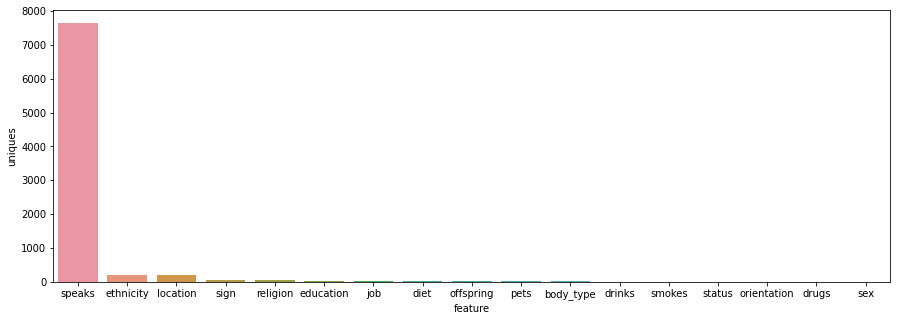

In [6]:
unique_dict = {}
for i in data_file.columns:
    if data_file[i].dtype == 'object':
        uniques= data_file[i].unique()
        nuniques= data_file[i].nunique()
        unique_dict[i] = nuniques
        print(f'''{i} has {nuniques} unique values: 
        {uniques}''')
print('###########SUMMARY##########')
print(unique_dict)

unique_df = pd.DataFrame.from_dict(unique_dict, orient='index', dtype=None, columns=(['uniques']))
unique_df.reset_index(inplace=True)
unique_df = unique_df.rename(columns = {'index':'feature'})

plt.figure(figsize=(15,5))
sns.barplot(data=unique_df, x='feature',y='uniques', order=unique_df.sort_values('uniques', ascending=False).feature)
plt.show()

Some object type features have many more unique values than anticipated: 217 unique values for ethnicity, 48 unique values for the zodiac sign and 7647 unique values for the spoken language are especially surprising. This is due to providing a combination of answers, e.g. mixed ethnicities and languages, commenting on your zodiac sign etc. Also, the location has 199 unique values, which is not surprising, however it can be reduced to include just the country/state instead of the exact city. These values need to be generalized in order to make them valuable for data modeling.

In [7]:
#we will modify the "speaks" feature to reflect only the first language provided
def leave_first_word(x):
    x_mod = str(x).split()[0]
    x_mod = x_mod.split(',')[0]
    return x_mod

data_file['speaks'] = data_file['speaks'].apply(leave_first_word)

#we will modify the "signs" feature to include only the first word, i.e. the sign itself, without the commentary
data_file['sign'] = data_file['sign'].apply(leave_first_word)

#we will modify the "religion" feature to include only the first word, i.e. the religion itself, without the commentary
data_file['religion'] = data_file['religion'].apply(leave_first_word)

#we will modify the "ethnicity" feature to include only the primary ethnicity, without the full mixture
def split_by_comma(x):
    x_mod = str(x).split(',')[0]
    return x_mod
data_file['ethnicity'] = data_file['ethnicity'].apply(split_by_comma)

#we will modify the "location" feature to include only the state/country (no city)      
def leave_last(x):
    x_mod = str(x).split(',')[-1]
    return x_mod

data_file['location'] = data_file['location'].apply(leave_last)

unique_dict = {}
for i in data_file.columns:
    if data_file[i].dtype == 'object':
        uniques= data_file[i].unique()
        nuniques= data_file[i].nunique()
        unique_dict[i] = nuniques
        print(f'''{i} has {nuniques} unique values: 
        {uniques}''')
        
 
        
print('###########SUMMARY##########')
print(unique_dict)

body_type has 12 unique values: 
        ['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
diet has 18 unique values: 
        ['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
drinks has 6 unique values: 
        ['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
drugs has 3 unique values: 
        ['never' 'sometimes' nan 'often']
education has 32 unique values: 
        ['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters program' 'graduated from space camp'
 'college/university' 'dropped out o

After unifying the data for some features, the number of their unique values became more manageable and easier to aggregate.

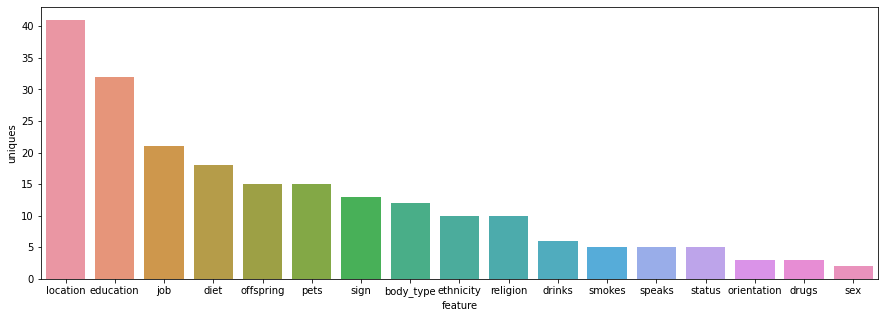

In [8]:
unique_df = pd.DataFrame.from_dict(unique_dict, orient='index', dtype=None, columns=(['uniques']))
unique_df.reset_index(inplace=True)
unique_df = unique_df.rename(columns = {'index':'feature'})
plt.figure(figsize=(15,5))
sns.barplot(data=unique_df, x='feature',y='uniques', order=unique_df.sort_values('uniques', ascending=False).feature)
plt.show()


Other object type features' unique values can be binned into broader categories as well.

In [9]:
#filling nans in the body type feature
data_file.body_type = data_file.body_type.fillna('no info')

#creating categories for the "body type" feature
body_type_categories = {'a little extra':'large', 'average':'medium', 'thin':'small', 'athletic':'athletic', 'fit':'athletic', 'skinny':'small', 'curvy':'large', 'full figured':'large', 'jacked':'athletic', 'rather not say':'no info', 'used up':'no info', 'overweight':'large', 'no info':'no info'}

data_file.body_type = data_file.body_type.apply(lambda x: body_type_categories[x])
print(f'New body type unique values: {data_file.body_type.unique()}')



New body type unique values: ['large' 'medium' 'small' 'athletic' 'no info']


In [10]:
#filling nans in the education feature
data_file.education = data_file.education.fillna('no info')

#creating categories for the "body type" feature
education_categories = {'working on ph.d program':'graduate','no info':'no info', 'working on college/university':'college/university student','working on space camp':'college/university student','graduated from masters program':'graduate','graduated from college/university':'graduate','working on two-year college':'college/university student','graduated from high school':'primary','working on masters program':'college/university student','graduated from space camp':'graduate','college/university':'graduate','dropped out of space camp':'primary', 'graduated from ph.d program':'PHD','two-year college':'graduate','graduated from two-year college':'graduate','working on med school':'college/university student','dropped out of college/university':'primary','space camp':'college/university student','graduated from med school':'graduate', 'dropped out of high school':'none', 'working on high school':'none', 'masters program':'college/university student','dropped out of ph.d program':'graduate', 'dropped out of two-year college':'primary', 'dropped out of med school':'primary', 'high school':'primary', 'working on law school':'college/university student','law school':'college/university student','dropped out of masters program':'primary','ph.d program':'PHD','dropped out of law school':'primary', 'med school':'graduate','graduated from law school':'graduate'}
data_file.education = data_file.education.apply(lambda x: education_categories[x])
print(f'New education unique values: {data_file.education.unique()}')

New education unique values: ['college/university student' 'graduate' 'no info' 'primary' 'PHD' 'none']


In [11]:
#filling nans in the diet feature
data_file.diet = data_file.diet.fillna('other')

#creating categories for the "diet" feature
diet_categories = {'other':'other', 'strictly anything':'anything', 'mostly other':'other', 'anything':'anything','vegetarian':'vegetarian','mostly anything':'anything','mostly vegetarian':'vegetarian', 'strictly vegan':'vegan','strictly vegetarian':'vegetarian', 'mostly vegan':'vegan', 'strictly other':'other', 'mostly halal':'halal', 'vegan':'vegan', 'mostly kosher':'kosher', 'strictly halal':'halal', 'halal':'halal', 'strictly kosher':'kosher', 'kosher':'kosher'}
data_file.diet = data_file.diet.apply(lambda x: diet_categories[x])
print(f'New diet unique values: {data_file.diet.unique()}')

New diet unique values: ['anything' 'other' 'vegetarian' 'vegan' 'halal' 'kosher']


In [12]:
#filling nans in the offspring feature
data_file.offspring = data_file.offspring.fillna('no info')

#creating categories for the "offspring" feature
offspring_categories = {'has a kid, but doesn&rsquo;t want more':'has kid(s)','no info':'no info', 'doesn&rsquo;t have kids, but might want them':'no kids, but wants','doesn&rsquo;t have kids, but might want them':'no kids, but wants', 'doesn&rsquo;t have kids, but wants them':'no kids, but wants','doesn&rsquo;t want kids':'not wanting kids', 'doesn&rsquo;t have kids':'no kids', 'wants kids':'no kids, but wants', 'has a kid':'has kid(s)', 'has kids':'has kid(s)', 'doesn&rsquo;t have kids, and doesn&rsquo;t want any':'not wanting kids','has kids, but doesn&rsquo;t want more':'has kid(s)', 'has a kid, and wants more':'has kid(s)', 'has kids, and might want more':'has kid(s)', 'might want kids':'no kids, but wants', 'has a kid, and might want more':'has kid(s)', 'has kids, and wants more':'has kid(s)'}
data_file.offspring = data_file.offspring.apply(lambda x: offspring_categories[x])
print(f'New offspring unique values: {data_file.offspring.unique()}')

New offspring unique values: ['no kids, but wants' 'no info' 'not wanting kids' 'no kids' 'has kid(s)']


In [13]:
#filling nans in the pets feature
data_file.pets = data_file.pets.fillna('no info')

#creating categories for the "pets" feature
pets_categories = {'no info':'no info', 'likes cats':'likes cats','likes dogs and likes cats':'likes cats and dogs', 'has cats':'likes cats', 'has dogs and likes cats':'likes cats and dogs', 'likes dogs and has cats':'likes cats and dogs', 'likes dogs and dislikes cats':'likes dogs and dislikes cats', 'has dogs':'likes dogs', 'has dogs and dislikes cats':'likes dogs and dislikes cats','likes dogs':'likes dogs', 'has dogs and has cats':'likes cats and dogs', 'dislikes dogs and has cats':'likes cats and dislikes dogs', 'dislikes dogs and dislikes cats':'dislikes both cats and dogs', 'dislikes cats':'dislikes cats', 'dislikes dogs and likes cats':'likes cats and dislikes dogs', 'dislikes dogs':'dislikes dogs'}
data_file.pets = data_file.pets.apply(lambda x: pets_categories[x])
print(f'New pets unique values: {data_file.pets.unique()}')

New pets unique values: ['likes cats and dogs' 'likes cats' 'no info'
 'likes dogs and dislikes cats' 'likes dogs'
 'likes cats and dislikes dogs' 'dislikes both cats and dogs'
 'dislikes cats' 'dislikes dogs']


In [14]:
#filling nans in the drugs and smokes and drinks feature and #creating categories for the drugs and smokes and drinks feature
new_categories = {'no info':'no info', 'socially':'sometimes', 'often':'often', 'not at all':'never', 'rarely':'rarely', 'very often':'very often', 'desperately':'very often', 'never':'never', 'sometimes':'sometimes', 'no':'never', 'when drinking':'sometimes', 'yes':'often', 'trying to quit':'trying to quit'}

for i in ['drinks', 'smokes', 'drugs']:
    data_file[i] = data_file[i].fillna('no info')
    data_file[i] = data_file[i].apply(lambda x: new_categories[x])
    print(f'New {i} unique values: {data_file[i].unique()}')


New drinks unique values: ['sometimes' 'often' 'never' 'rarely' 'no info' 'very often']
New smokes unique values: ['sometimes' 'never' 'no info' 'often' 'trying to quit']
New drugs unique values: ['never' 'sometimes' 'no info' 'often']


In [15]:

#creating categories for the "status" feature
data_file.status = data_file.status.replace(to_replace='single', value='available')
data_file.status = data_file.status.replace(to_replace='unknown', value='no info')
print(f'New status unique values: {data_file.status.unique()}')

New status unique values: ['available' 'seeing someone' 'married' 'no info']


body_type has 5 unique values: 
        ['large' 'medium' 'small' 'athletic' 'no info']
diet has 6 unique values: 
        ['anything' 'other' 'vegetarian' 'vegan' 'halal' 'kosher']
drinks has 6 unique values: 
        ['sometimes' 'often' 'never' 'rarely' 'no info' 'very often']
drugs has 4 unique values: 
        ['never' 'sometimes' 'no info' 'often']
education has 6 unique values: 
        ['college/university student' 'graduate' 'no info' 'primary' 'PHD' 'none']
ethnicity has 10 unique values: 
        ['asian' 'white' 'nan' 'hispanic / latin' 'pacific islander' 'black'
 'middle eastern' 'native american' 'indian' 'other']
job has 21 unique values: 
        ['transportation' 'hospitality / travel' nan 'student'
 'artistic / musical / writer' 'computer / hardware / software'
 'banking / financial / real estate' 'entertainment / media'
 'sales / marketing / biz dev' 'other' 'medicine / health'
 'science / tech / engineering' 'executive / management'
 'education / academia' 'clerical

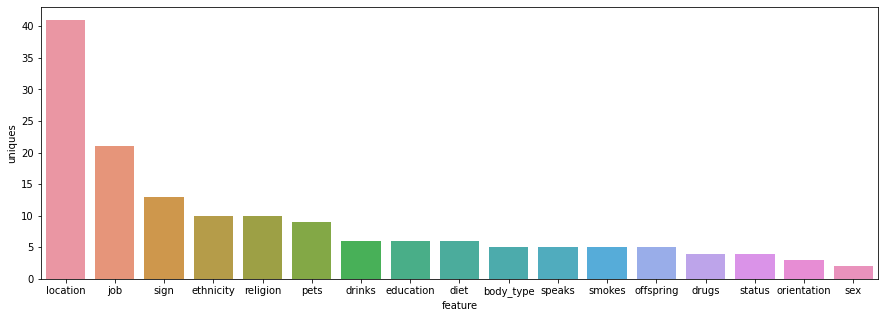

In [16]:
unique_dict = {}
for i in data_file.columns:
    if data_file[i].dtype == 'object':
        uniques= data_file[i].unique()
        nuniques= data_file[i].nunique()
        unique_dict[i] = nuniques
        print(f'''{i} has {nuniques} unique values: 
        {uniques}''')
        
 
        
print('###########SUMMARY##########')
print(unique_dict)

unique_df = pd.DataFrame.from_dict(unique_dict, orient='index', dtype=None, columns=(['uniques']))
unique_df.reset_index(inplace=True)
unique_df = unique_df.rename(columns = {'index':'feature'})
plt.figure(figsize=(15,5))
sns.barplot(data=unique_df, x='feature',y='uniques', order=unique_df.sort_values('uniques', ascending=False).feature)
plt.show()

Checking for nans in all features of interest:

In [17]:
for i in data_file.columns:
    nans = np.round(data_file[i].isna().sum() / len(data_file) * 100, 5)
    print(f'{i} nans: {nans}')

age nans: 0.0
body_type nans: 0.0
diet nans: 0.0
drinks nans: 0.0
drugs nans: 0.0
education nans: 0.0
ethnicity nans: 0.0
height nans: 0.005
income nans: 0.0
job nans: 13.67564
location nans: 0.0
offspring nans: 0.0
orientation nans: 0.0
pets nans: 0.0
religion nans: 0.0
sex nans: 0.0
sign nans: 0.0
smokes nans: 0.0
speaks nans: 0.0
status nans: 0.0


In [22]:
# data.dropna(subset=['Height','Education'], #only looks at these two columns
#             inplace=True, #removes the rows and keeps the data variable
#             how='any') #removes data with missing data in either field
data_file['height'] = data_file['height'].fillna('no info')
data_file['job'] = data_file['job'].fillna('no info')

### Data distribution and outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          59946 non-null  int64 
 1   body_type    59946 non-null  object
 2   diet         59946 non-null  object
 3   drinks       59946 non-null  object
 4   drugs        59946 non-null  object
 5   education    59946 non-null  object
 6   ethnicity    59946 non-null  object
 7   height       59946 non-null  object
 8   income       59946 non-null  int64 
 9   job          59946 non-null  object
 10  location     59946 non-null  object
 11  offspring    59946 non-null  object
 12  orientation  59946 non-null  object
 13  pets         59946 non-null  object
 14  religion     59946 non-null  object
 15  sex          59946 non-null  object
 16  sign         59946 non-null  object
 17  smokes       59946 non-null  object
 18  speaks       59946 non-null  object
 19  status       59946 non-nu

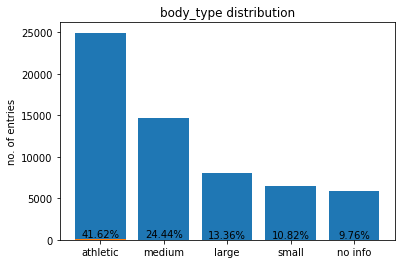

diet


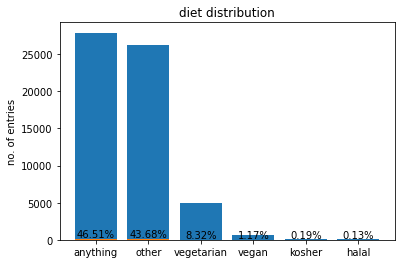

drinks


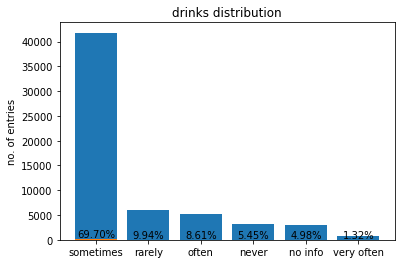

drugs


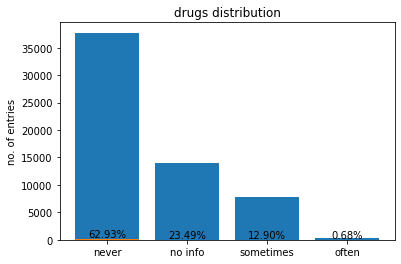

education


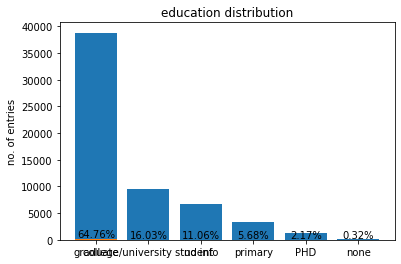

ethnicity


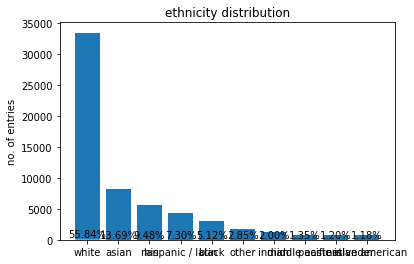

height


TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

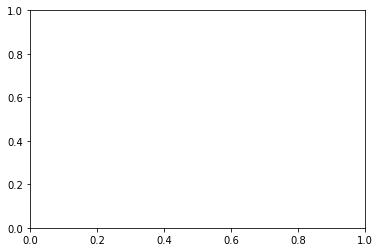

In [78]:
print(data_file.info())
for i in data_file.columns:
    if data_file[i].dtype == 'object':
        print(i)
        fig, ax = plt.subplots()
        counts = data_file[i].value_counts()
        values = counts.index
        perc = counts.apply(lambda x: x / data_file[i].count() * 100)
        bar_container = ax.bar(values, counts)
        bar_container2 = ax.bar(values, perc)
        ax.set(ylabel='no. of entries', title=f'{i} distribution')
        ax.bar_label(bar_container2, fmt='%.2f%%')
        plt.show()
        plt.clf


## DATA CORRELATION ANALYSIS

# MACHINE LEARNING

## FEATURE ENGINEERING

## HYPERPARAMETER TUNING

## MODELING AND EVALUATION

# CONCLUSIONS